In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
columns_names=['user_id','item_id','rating','timestamp']
df=pd.read_csv("ml-100k/u.data",sep='\t',names=columns_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
df['user_id'].nunique()

943

In [6]:

MovieTitle=pd.read_csv("ml-100k/u.item",sep='\|',header=None)

In [7]:
MovieTitle=MovieTitle[[0,1]]
MovieTitle.columns=['item_id','movie_name']

In [8]:
MovieTitle.head()

,item_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df['item_id'].nunique()

1682

In [10]:
df=pd.merge(df,MovieTitle,on='item_id')

In [11]:
df

,user_id,item_id,rating,timestamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


IN the above we have merged the data on the basis of item id succh that if the item id is 1 in df the the output of movie name of item id 1 will be printed i n front of that itemid


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [13]:
#by this mean we can find the average rating of the movie
df.groupby('movie_name').mean()['rating']

movie_name
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [14]:
#sort these values in descending order
df.groupby('movie_name').mean()['rating'].sort_values(ascending=False)

movie_name
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [15]:
df.groupby('movie_name').count()

,user_id,item_id,rating,timestamp
movie_name,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41
...,...,...,...,...
Young Guns II (1990),44,44,44,44
"Young Poisoner's Handbook, The (1995)",41,41,41,41
Zeus and Roxanne (1997),6,6,6,6


In [16]:
df.groupby('movie_name').count()['rating'].sort_values(ascending=False)

movie_name
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [17]:
#now lets create a data frame for rating and no. of ratings given to that movie
ratings=pd.DataFrame(df.groupby('movie_name').mean()['rating'])
ratings.head()

,rating
movie_name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [18]:
ratings['numberOfRatings']=df.groupby('movie_name').count()['rating']
ratings.sort_values(by='rating',ascending=False)



,rating,numberOfRatings
movie_name,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


In [19]:
ratings.head()

,rating,numberOfRatings
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


(array([520., 171., 122., 103.,  71.,  81.,  57.,  58.,  45.,  38.,  39.,
         25.,  26.,  22.,  25.,  28.,  14.,  16.,  14.,  15.,  24.,  15.,
          9.,   9.,   8.,   9.,  12.,   7.,   6.,   7.,   7.,   6.,   3.,
          5.,   3.,  11.,   2.,   3.,   2.,   2.,   1.,   3.,   0.,   1.,
          1.,   2.,   2.,   2.,   0.,   1.,   1.,   2.,   0.,   0.,   1.,
          0.,   0.,   2.,   1.,   0.,   2.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([  1.        ,   9.31428571,  17.62857143,  25.94285714,
         34.25714286,  42.57142857,  50.88571429,  59.2       ,
         67.51428571,  75.82857143,  84.14285714,  92.45714286,
        100.77142857, 109.08571429, 117.4       , 125.71428571,
        134.02857143, 142.34285714, 150.65714286, 158.97142857,
        167.28571429, 175.6       , 183.91428571, 192.22857143,
        200.54285714, 208.85714286, 217.17142857, 225.48571429,
        233.8       , 242.11428571, 250.42857143, 258.74285714,
        26

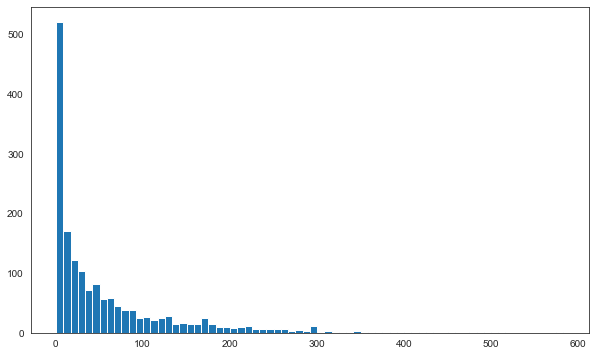

In [20]:
plt.figure(figsize=(10,6))
plt.hist(ratings['numberOfRatings'],bins=70)

In [21]:
#this means that there are many movies which have been rated 0-10 times but there are very less movies which have been 
#rated more than 200 times


(array([ 69.,   0.,   1.,   0.,   2.,   4.,   0.,   1.,  11.,   0.,   4.,
          7.,   4.,   3.,   9.,   7.,   6.,  52.,   3.,   7.,  19.,  26.,
         15.,  17.,  34.,  20.,  45.,  21.,  27.,  43.,  45.,  38.,  36.,
         32.,  12., 127.,  40.,  63.,  46.,  45.,  57.,  32.,  53.,  59.,
         42.,  49.,  52.,  36.,  45.,  45.,  35.,  35.,  64.,  24.,  27.,
         14.,  15.,  11.,   5.,   2.,   5.,   5.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,  10.]),
 array([1.        , 1.05714286, 1.11428571, 1.17142857, 1.22857143,
        1.28571429, 1.34285714, 1.4       , 1.45714286, 1.51428571,
        1.57142857, 1.62857143, 1.68571429, 1.74285714, 1.8       ,
        1.85714286, 1.91428571, 1.97142857, 2.02857143, 2.08571429,
        2.14285714, 2.2       , 2.25714286, 2.31428571, 2.37142857,
        2.42857143, 2.48571429, 2.54285714, 2.6       , 2.65714286,
        2.71428571, 2.77142857, 2.82857143, 2.88571429, 2.94285714,
        3.        , 3.05714286, 3.11428571, 3.

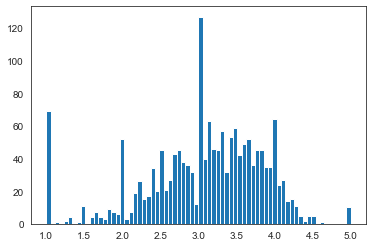

In [22]:
plt.hist(ratings['rating'],bins=70)

In [23]:
#this means that most of the users rated 3 to the movie

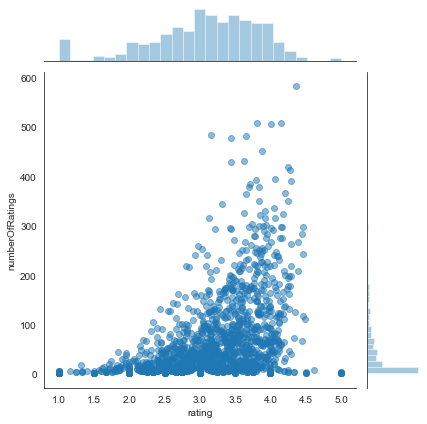

In [24]:
sns.jointplot(x='rating',y='numberOfRatings',data=ratings,alpha=0.5)

In [25]:
#here u can see that the average rating of the movie increase then also no of ratings on that movie also increase 
# here v can also notice that when the rating is 5* then at that time no. of ratings is very less

CREATING MOVIE RECOMENDATION

In [26]:
df.head()

,user_id,item_id,rating,timestamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [27]:
#now create a movie matrix which will tell that a person with user id x has rated which which movies
moviemat=df.pivot_table(index='user_id',columns='movie_name',values='rating')
moviemat['12 Angry Men (1957)']

user_id
1      5.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
939    NaN
940    NaN
941    NaN
942    NaN
943    NaN
Name: 12 Angry Men (1957), Length: 943, dtype: float64

In [28]:
ratings.sort_values(by='numberOfRatings',ascending=False)

,rating,numberOfRatings
movie_name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [29]:
starwar_user_rating=moviemat['Star Wars (1977)']
starwar_user_rating.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [30]:
#ab y correlation a g starwar movie k dusre movies k sth
similar_to_starwar=moviemat.corrwith(starwar_user_rating)
corr_starwars=pd.DataFrame(similar_to_starwar,columns=['correlation'])

In [31]:
corr_starwars.dropna(inplace=True)

In [32]:
corr_starwars.head()

,correlation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [33]:
corr_starwars

,correlation
movie_name,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


In [34]:
corr_starwars.sort_values(by='correlation',ascending=False)

,correlation
movie_name,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
...,...
Roseanna's Grave (For Roseanna) (1997),-1.0
For Ever Mozart (1996),-1.0
American Dream (1990),-1.0


In [35]:
corr_starwars.sort_values(by='correlation',ascending=False).head()

,correlation
movie_name,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0


In [36]:
#here as we dont know the no of ratings by the user so its not obvious that Hollow Reed (1996)	 which is on top should
#be the correct ans so we want a movie which is equally correlated and as many people have also watched that movie so eg
# more than 100 people should have watched the movie

In [37]:
corr_starwars=corr_starwars.join(ratings['numberOfRatings'])
corr_starwars.head()

,correlation,numberOfRatings
movie_name,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [38]:
corr_starwars[corr_starwars['numberOfRatings']>100].sort_values('correlation',ascending=False)

,correlation,numberOfRatings
movie_name,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [39]:
corr_starwars[corr_starwars['numberOfRatings']>100].sort_values('correlation',ascending=False).head()

,correlation,numberOfRatings
movie_name,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


PREDICT MOVIES

In [40]:
#function
def predict(movie_name):
    
    movie_user_rating=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_rating)
    corr_movie=pd.DataFrame(similar_to_movie,columns=['correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie=corr_movie.join(ratings[['numberOfRatings','rating']])
    prediction=corr_movie[corr_movie['numberOfRatings']>100].sort_values('correlation',ascending=False)
    return prediction

    

In [44]:
pr=predict('River Wild, The (1994)')
pr.head()

,correlation,numberOfRatings,rating
movie_name,,,
"River Wild, The (1994)",1.000000,146,3.143836
Kiss the Girls (1997),0.744500,143,3.461538
Young Guns (1988),0.662424,101,3.207921
Seven Years in Tibet (1997),0.640866,155,3.458065
My Best Friend's Wedding (1997),0.576746,172,3.360465
